In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotting.templates import plot_dens_scatter, plot_n_boxplots

In [2]:
stab_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\accumulate")
results_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_0")

Analysing the epoch distribution of the raw data

In [32]:
quasi_dist_x = np.empty((16, 120))
quasi_dist_y = np.empty((16, 120))
peaks_dist_x = np.empty((16, 120))
peaks_dist_y = np.empty((16, 120))

In [33]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    current = np.load(pth)
    quasi_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    current = np.load(pth)
    quasi_dist_y[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    current = np.load(pth)
    peaks_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    current = np.load(pth)
    peaks_dist_y[i, :] = current.copy()

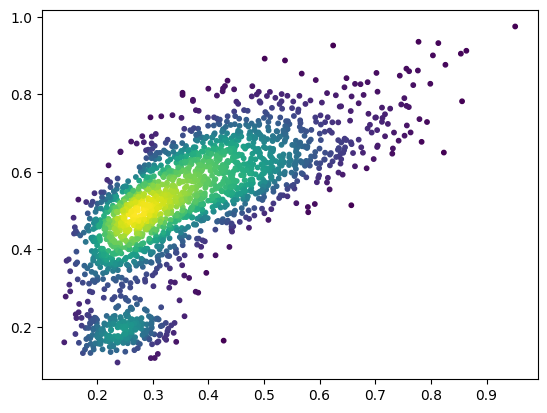

In [34]:
plot_dens_scatter(quasi_dist_y, peaks_dist_y, "Dis Distribution", "dis", "abs_dis")

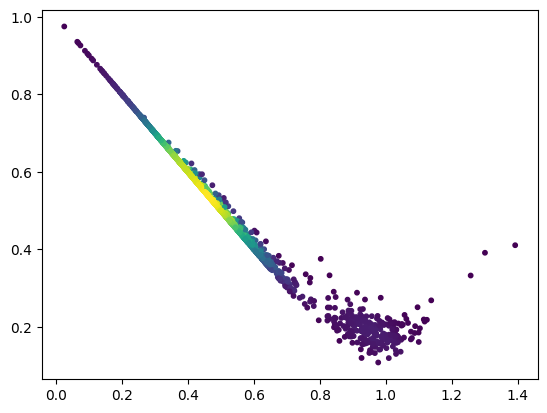

In [6]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the effect of different parameters

In [15]:
all_results = np.empty(
    (
        16,
        2,
        2,
        2,
        2,
        12,
        12,
        5
    )
)

In [16]:
for i, pth in enumerate(results_folder.iterdir()):
    current = np.load(pth)
    all_results[i, :, :, :, :, :, :] = current.copy()

In [17]:
all_results = np.nan_to_num(all_results)

In [18]:
for i in range(16):
    all_results[i, :, :, :, :, :, :, :] -= all_results[i, 1, 1, 1, 1, 0, 0, 0]

Pooled data, to se what works best for both

Best params

In [19]:
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 0], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 1], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 2], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 3], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 4], 0)), (2, 2, 2, 2, 12, 12)))

(0, 1, 0, 0, 11, 11)
(0, 1, 0, 0, 7, 8)
(0, 1, 0, 0, 7, 1)
(0, 0, 1, 1, 11, 5)
(0, 1, 0, 0, 8, 2)


Quasi and peaks distribution of best params solution.

Effect of quasi_channel exclusion

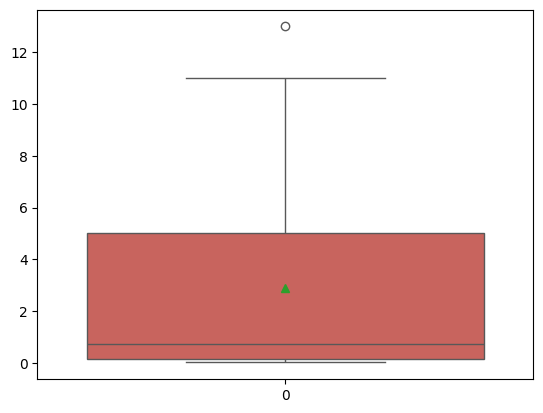

In [20]:
plot_n_boxplots([all_results[:, 0, 1, 1, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of Peaks_channel exclusion

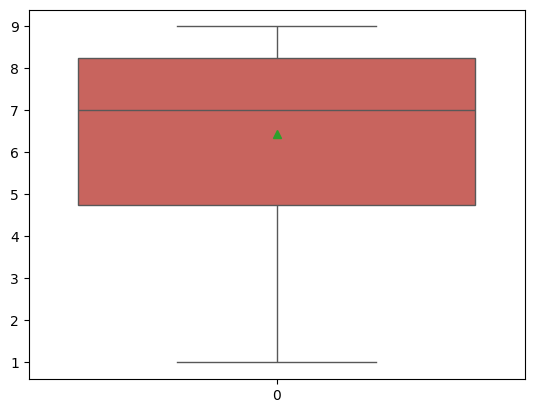

In [21]:
plot_n_boxplots([all_results[:, 1, 0, 1, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of channel correlation exclusion

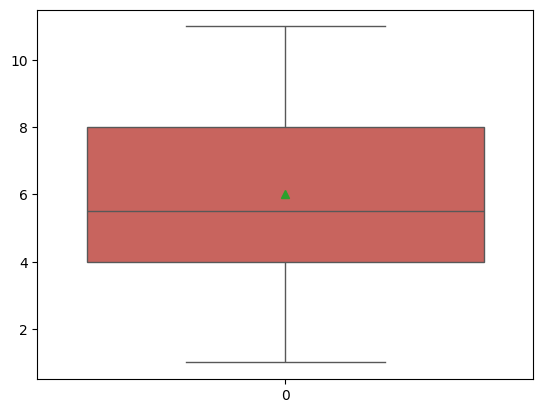

In [22]:
plot_n_boxplots([all_results[:, 1, 1, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of quasi epoch exclusion

In [23]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, 0, 0, 0, 0, i, 0, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

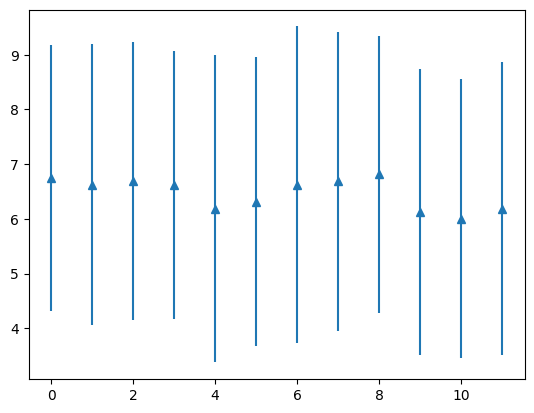

[6.75   6.625  6.6875 6.625  6.1875 6.3125 6.625  6.6875 6.8125 6.125
 6.     6.1875]


In [24]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [25]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, i, :, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

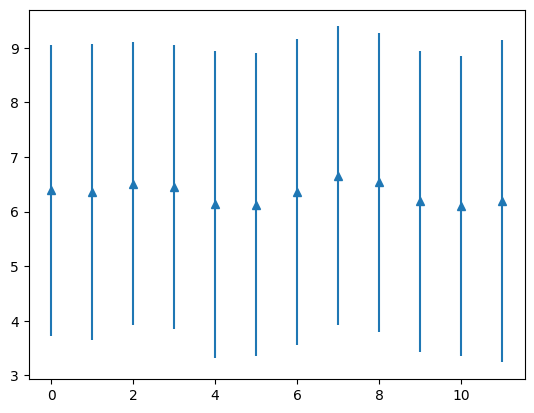

[6.39257812 6.35286458 6.515625   6.44986979 6.13151042 6.12565104
 6.35611979 6.65950521 6.54036458 6.19075521 6.11067708 6.18815104]


In [26]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

Effect of peaks epoch exclusion

In [27]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, 0, 0, 0, 0, 0, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

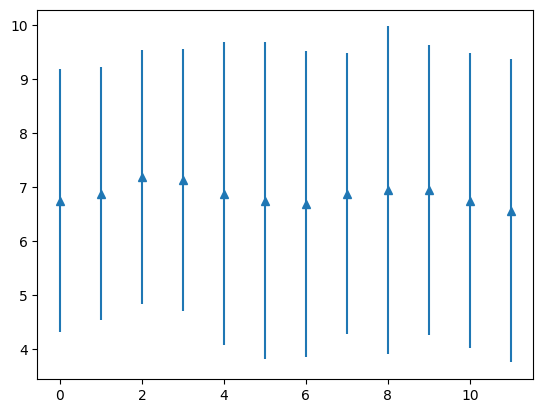

[6.75   6.875  7.1875 7.125  6.875  6.75   6.6875 6.875  6.9375 6.9375
 6.75   6.5625]


In [28]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [29]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, :, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

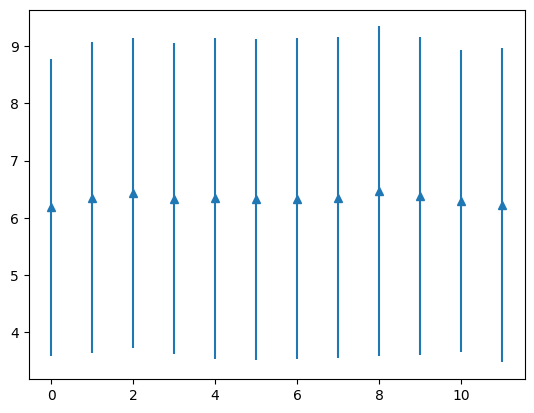

[6.18229167 6.35351562 6.43294271 6.33528646 6.33854167 6.32291667
 6.33398438 6.35026042 6.46679688 6.38216146 6.296875   6.21809896]


In [30]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)